# Indices for trajectories in semantic space

In this notebook I compute volume and circuitousness of trajectories in embedding-space as defined by Toubia et al. 2021 https://doi.org/10.1073/pnas.2011695118 .

I also compute information such as jump length and speed for each step in a trajectory.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from think_aloud.compute_indices import voldf, circdf, probe_to_trajectory, block_to_trajectory, probe_sub_to_trajectory

In [3]:
# %% Read data

# --- Experience data in original segmentation level ---
df_rows = pd.read_csv("../data/text_rows.csv", sep="\t")


# Group row-level data into probes
probes = df_rows.groupby(['suj','bloc','prob'], group_keys=False)

# --- Experience data segmented at probe level ---

df_probes = pd.read_csv("../data/text_probes.csv", sep="\t")

# Group probe-level data into blocks
blocks = df_probes.groupby(['suj','bloc'], group_keys=False)

# --- Experience data segmented at subrow level ---
df_subrows = pd.read_csv("../data/text_subrows.csv", sep="\t")

# Group subrow-level data into probes
probes_sub = df_subrows.groupby(['suj','bloc','prob'], group_keys=False)

# --- Subject data ---
subj_data = pd.read_csv("../data/info_participants.csv", sep="\t").dropna()

# Subject data clean-up
# Correct some entries which are lowercase, replace 'H' -> 'M', simplify names, convert strings to integers
subj_data.genre = subj_data.genre.str.upper()
subj_data.genre = subj_data.genre.apply(lambda s: 'M' if s=='H' else s)
subj_data = subj_data.rename(columns={"total-MEWS":"MEWS"})
for colname in subj_data.columns.drop(["genre", "exp", "level", "topic"]):
    subj_data[colname] = subj_data[colname].astype('int', errors='ignore')

# %% Load embeddings

row_embeddings = np.load("../data/row_embeddings.npy")
probe_embeddings = np.load("../data/probe_embeddings.npy")
subrow_embeddings = np.load("../data/subrow_embeddings.npy")



In [4]:
subj_data.dtypes

sujet       int32
age         int32
genre      object
exp        object
level      object
topic      object
ADHD        int32
ADHD-1      int32
ADHD-2      int32
ADHD-3      int32
ADHD-4      int32
ADHD-5      int32
ADHD-6      int32
ADHD-7      int32
ADHD-8      int32
ADHD-9      int32
ADHD-10     int32
ADHD-11     int32
ADHD-12     int32
ADHD-13     int32
ADHD-14     int32
ADHD-15     int32
ADHD-16     int32
ADHD-17     int32
ADHD-18     int32
MEWS        int32
MEWS-1      int32
MEWS-2      int32
MEWS-3      int32
MEWS-4      int32
MEWS-5      int32
MEWS-6      int32
MEWS-7      int32
MEWS-8      int32
MEWS-9      int32
MEWS-10     int32
MEWS-11     int32
MEWS-12     int32
MEWS-13     int32
MEWS-14     int32
MEWS-15     int32
dtype: object

In [8]:

# Get inattention and impulsivity scores separately
ADHD_inatt = lambda df: df[[f"ADHD-{n}" for n in (1,2,3,4,7,8,9,10,11)]].astype('int').sum(1)
ADHD_impuls = lambda df: df[[f"ADHD-{n}" for n in (5,6,12,13,14,15,16,17,18)]].astype('int').sum(1)

# Prepare some dataframe for exportation
def prepare_export(indexdf, columns):
    df = indexdf.merge(subj_data, how='left', left_on='suj', right_on='sujet').dropna()
    
    df.insert(0, 'ADHD_inatt', ADHD_inatt(df))
    df.insert(0, 'ADHD_impuls', ADHD_impuls(df))
    df = df[columns]
    
    return df


In [6]:

# %% Analysis of volume

row_vol = voldf(df_rows, row_embeddings)
probe_vol = voldf(df_probes, probe_embeddings)
subrow_vol = voldf(df_subrows, subrow_embeddings)


MVEE is singular, 29 points, 26 dimensions
MVEE is singular, 12 points, 11 dimensions
MVEE is singular, 53 points, 52 dimensions
MVEE is singular, 102 points, 96 dimensions
MVEE is singular, 37 points, 35 dimensions
MVEE is singular, 30 points, 29 dimensions
MVEE is singular, 51 points, 50 dimensions
MVEE is singular, 19 points, 18 dimensions
MVEE is singular, 36 points, 35 dimensions
MVEE is singular, 29 points, 28 dimensions
MVEE is singular, 30 points, 29 dimensions
MVEE is singular, 44 points, 43 dimensions
MVEE is singular, 33 points, 31 dimensions
MVEE is singular, 70 points, 68 dimensions
MVEE is singular, 28 points, 27 dimensions
MVEE is singular, 57 points, 54 dimensions
MVEE is singular, 67 points, 65 dimensions
MVEE is singular, 21 points, 20 dimensions
MVEE is singular, 25 points, 24 dimensions
MVEE is singular, 28 points, 26 dimensions
MVEE is singular, 21 points, 20 dimensions
MVEE is singular, 20 points, 18 dimensions
MVEE is singular, 21 points, 20 dimensions
MVEE is si

In [9]:

# %% Prepare and export volume data

row_voldf = prepare_export(row_vol, ['suj','age','genre','exp','level','topic',
                       'ADHD','ADHD_inatt','ADHD_impuls','MEWS',
                       'nbpoints','vol'])
subrow_voldf = prepare_export(subrow_vol, ['suj','age','genre','exp','level','topic',
                       'ADHD','ADHD_inatt','ADHD_impuls','MEWS',
                       'nbpoints','vol'])
probe_voldf = prepare_export(probe_vol, ['suj','age','genre','exp','level','topic',
                       'ADHD','ADHD_inatt','ADHD_impuls','MEWS',
                       'nbpoints','vol'])

row_voldf.to_csv("../data/volume_rows.csv", sep="\t", index=False)
subrow_voldf.to_csv("../data/volume_subrows.csv", sep="\t", index=False)
probe_voldf.to_csv("../data/volume_probes.csv", sep="\t", index=False)


In [10]:
row_voldf.dtypes

suj            float64
age            float64
genre           object
exp             object
level           object
topic           object
ADHD           float64
ADHD_inatt       int64
ADHD_impuls      int64
MEWS           float64
nbpoints       float64
vol            float64
dtype: object

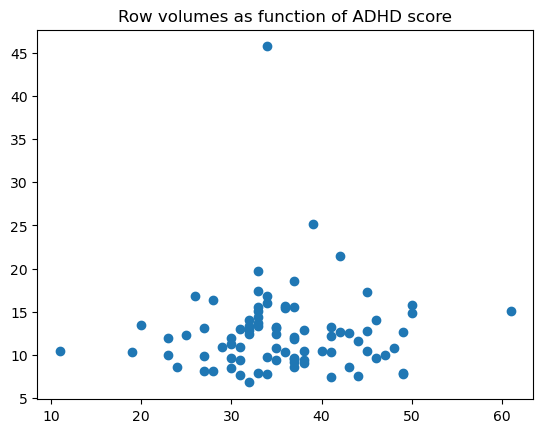

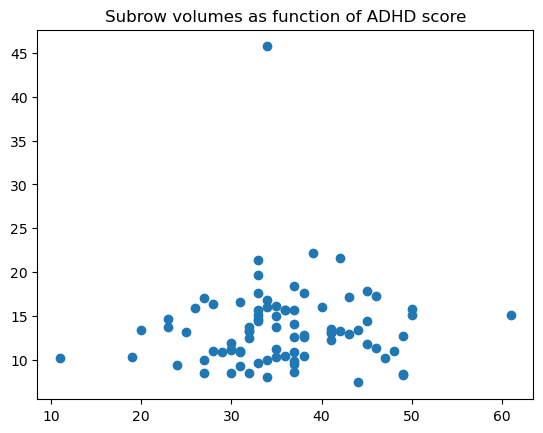

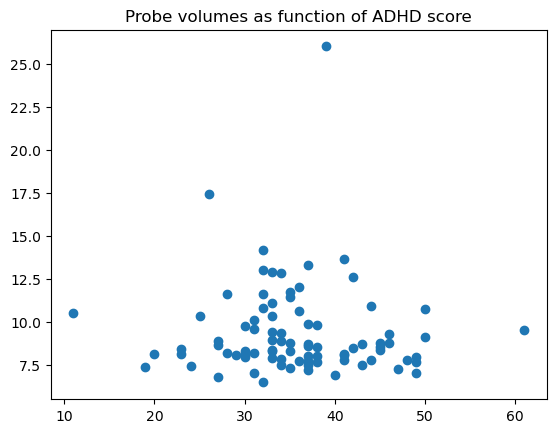

In [13]:

# %% Scatterplots of volume as function of ADHD
plt.scatter(row_voldf.ADHD, row_voldf.vol)
plt.title("Row volumes as function of ADHD score")
plt.show()

plt.scatter(subrow_voldf.ADHD, subrow_voldf.vol)
plt.title("Subrow volumes as function of ADHD score")
plt.show()

plt.scatter(probe_voldf.ADHD, probe_voldf.vol)
plt.title("Probe volumes as function of ADHD score")
plt.show()


In [ ]:

# %% Analysis of circuitousness

row_circ = circdf(df_rows, row_embeddings, "prob")
subrow_circ = circdf(df_subrows, subrow_embeddings, "prob")
probe_circ = circdf(df_probes, probe_embeddings, "bloc")


In [ ]:

# %% Prepare and export circuitousness data

row_circdf = prepare_export(row_circ, ['suj','age','genre','exp','level','topic',
                       'ADHD','ADHD_inatt','ADHD_impuls','MEWS',
                       'bloc','prob','nbpoints','circ'])
subrow_circdf = prepare_export(subrow_circ, ['suj','age','genre','exp','level','topic',
                       'ADHD','ADHD_inatt','ADHD_impuls','MEWS',
                       'bloc','prob','nbpoints','circ'])
probe_circdf = prepare_export(probe_circ, ['suj','age','genre','exp','level','topic',
                       'ADHD','ADHD_inatt','ADHD_impuls','MEWS',
                       'bloc','nbpoints','circ'])

row_circdf.to_csv("../data/circ_rows.csv", sep="\t", index=False)
subrow_circdf.to_csv("../data/circ_subrows.csv", sep="\t", index=False)
probe_circdf.to_csv("../data/circ_probes.csv", sep="\t", index=False)


In [ ]:

# %% Analysis of transitions at row level

trajectories_rows = probes.apply(probe_to_trajectory)

# Delete null trajectories
trajectories_rows = trajectories_rows[trajectories_rows.isnull()==False]

#nb_trajectories_rows = len(trajectories_rows)
#print(f"There are {nb_trajectories_rows} non-null trajectories out of {nb_probes}")


# Separate transitions as units

transitions_rows = []

for index,traj in trajectories_rows.iteritems():
    for datatraj in traj:
        transitions_rows.append((*index, *datatraj))
        
transitions_rows = pd.DataFrame(data = transitions_rows,
                           columns=['suj','bloc','prob','length','interv',
                                    'pause','speed'])

#nb_transitions_rows = len(transitions_rows)
#print(f"There are {nb_transitions_rows} transitions at row level")


In [ ]:

# %% Prepare and export row-level transitions for statistical analysis in R

df = prepare_export(transitions_rows, ['suj','bloc','prob',
                                       'length','interv','pause','speed',
         'age','genre','exp','level','topic',
         'ADHD','ADHD_inatt', 'ADHD_impuls','MEWS'])

df.to_csv("../data/row_as_embedding_transitions.csv", sep='\t', index=False)


In [ ]:

# %% Analysis of transitions at probe level

trajectories_prob = blocks.apply(block_to_trajectory)

# Delete null trajectories
trajectories_prob = trajectories_prob[trajectories_prob.isnull()==False]

# Separate transitions as units

transitions_prob = []

for index,traj in trajectories_prob.iteritems():
    for jumplength in traj:
        transitions_prob.append((*index, jumplength))
        
transitions_prob = pd.DataFrame(data = transitions_prob,
                           columns=['suj','bloc','length'])


In [ ]:

# %% Prepare and export probe-level transitions for statistical analysis in R

df2 = prepare_export(transitions_prob, ['suj','bloc','length',
         'age','genre','exp','level','topic',
         'ADHD','ADHD_inatt', 'ADHD_impuls','MEWS'])

df2.to_csv("../data/probe_as_embedding_transitions.csv", sep='\t', index=False)


In [ ]:

# %% Analysis of transitions at subrow level


trajectories_sub = probes_sub.apply(probe_sub_to_trajectory)

# Delete null trajectories
trajectories_sub = trajectories_sub[trajectories_sub.isnull()==False]

# Separate transitions as units

transitions_sub = []

for index,traj in trajectories_sub.iteritems():
    for jumplength in traj:
        transitions_sub.append((*index, jumplength))
        
transitions_sub = pd.DataFrame(data = transitions_sub,
                           columns=['suj','bloc','prob','length'])


In [ ]:

# %% Prepare and export subrow-level transitions for statistical analysis in R

df3 = prepare_export(transitions_sub, ['suj','bloc','length',
         'age','genre','exp','level','topic',
         'ADHD','ADHD_inatt', 'ADHD_impuls','MEWS'])

df3.to_csv("../data/subrow_as_embedding_transitions.csv", sep='\t', index=False)